# 使用 Gradio 进行演示


这个笔记本通过一个示例介绍了 [Gradio](https://www.gradio.app/) 库，该库能够帮助您**轻松创建演示界面**。


## 对象检测界面


在这个示例中，我们使用一个**图像对象检测模型**，该模型在包含 80 个类别的 [COCO 数据集](https://cocodataset.org/#home)上进行了训练。
具体采用的是 Meta 开发的 [DETR 模型](https://research.facebook.com/publications/end-to-end-object-detection-with-transformers/)（facebook/detr-resnet-50）。


### 实现过程


首先，我们使用 Hugging Face 的 `transformers` 库来**构建处理流程**。


In [1]:
from PIL import Image
import matplotlib.pyplot as plt
from transformers import pipeline
import cv2
import numpy as np

/home/aquilae/anaconda3/envs/dev/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
detector = pipeline("object-detection", "facebook/detr-resnet-50")

Some weights of the model checkpoint at facebook/detr-resnet-50 were not used when initializing DetrForObjectDetection: ['model.backbone.conv_encoder.model.layer1.0.downsample.1.num_batches_tracked', 'model.backbone.conv_encoder.model.layer2.0.downsample.1.num_batches_tracked', 'model.backbone.conv_encoder.model.layer3.0.downsample.1.num_batches_tracked', 'model.backbone.conv_encoder.model.layer4.0.downsample.1.num_batches_tracked']
- This IS expected if you are initializing DetrForObjectDetection from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DetrForObjectDetection from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


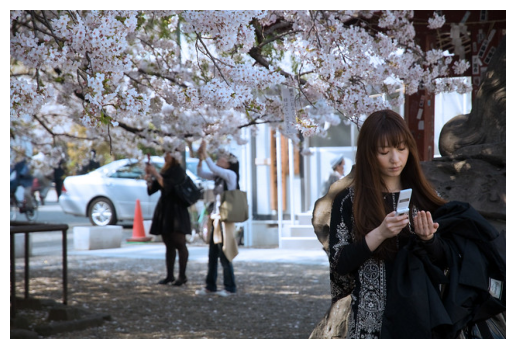

In [3]:
image = Image.open('images/coco3.jpg')
plt.imshow(image)
plt.axis('off')
plt.show()

接下来进行**对象检测并绘制边界框**。为了保持结果清晰，我们**仅标记图中的人**。如果需要检测其他类别，可以移除此过滤条件。


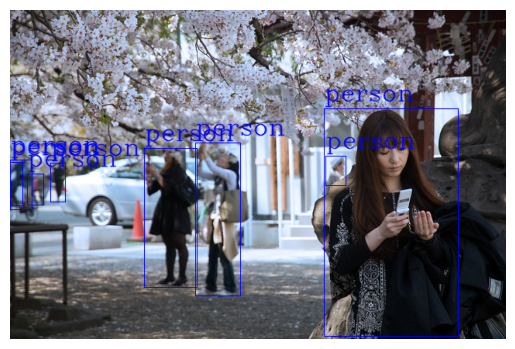

In [4]:
def draw_boxes(image,output):
  cv_image = np.array(image)
  for bbox in output:
    box = bbox['box']
    label = bbox['label']
    if (label!="person"):
      continue
    cv2.rectangle(cv_image, (box['xmin'], box['ymin']), (box['xmax'], box['ymax']), (0, 0, 255), 1)
    cv2.putText(cv_image, label, (box['xmin'], box['ymin'] - 10), cv2.FONT_HERSHEY_COMPLEX, 1, (0, 0, 255), 1, cv2.LINE_AA)
  return cv_image

output = detector(image)
cv_image=draw_boxes(image,output)
plt.imshow(cv_image)
plt.axis('off')
plt.show()


### Gradio 演示


现在，我们将用 Gradio **构建一个演示界面**。该界面的功能是：
- **输入**：一张图片
- **输出**：在同一张图片上**标记出所有人**的位置。


In [5]:
import gradio as gr

In [6]:
def get_pipeline_prediction(pil_image):
  pipeline_output = detector(pil_image)
  processed_image = draw_boxes(pil_image,pipeline_output)
  return processed_image

In [7]:
demo = gr.Interface(
  fn=get_pipeline_prediction,
  inputs=gr.Image(label="Image d'entrée",type="pil"),
  outputs=gr.Image(label="Image avec les personnes détectées",type="pil")
)

IMPORTANT: You are using gradio version 4.24.0, however version 4.29.0 is available, please upgrade.
--------


In [8]:
demo.launch()

Running on local URL:  http://127.0.0.1:7860

To create a public link, set `share=True` in `launch()`.


这样，您的**自定义演示界面**就完成了！
您可以通过在 `launch()` 方法中设置 `share=True` 参数来**共享这个演示**。但请注意：
- 共享期间需保持笔记本处于**活动状态**，否则演示将消失。
- 如果希望**无需保持电脑开机**也能运行演示，可在 Hugging Face 网站上创建一个 Space（详见笔记本 1）。


**注意**：Gradio 的功能远不止于此。
如果您有更多定制需求，可查阅：
- [官方文档](https://www.gradio.app/docs)
- [快速入门教程](https://www.gradio.app/guides/quickstart)
